In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa
!pip install ipython
!apt install ffmpeg
!pip install pygal
!pip install biokit

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     |████████████████████████████████| 127 kB 5.1 MB/s 
     |████████████████████████████████| 162 kB 5.1 MB/s 
     |████████████████████████████████| 47 kB 3.2 MB/s 
     |████████████████████████████████| 202 kB 32.7 MB/s 
     |████████████████████████████████| 2.3 MB 46.5 MB/s 
     |████████████████████████████████| 47 kB 4.7 MB/s 
     |████████████████████████████████| 44 kB 2.3 MB/s 
     |████████████████████████████████| 323 kB 59.1 MB/s 
     |████████████████████████████████| 5.8 MB 31.1 MB/s 
     |████████████████████████████████| 251 kB 69.0 MB/s 
     |████████████████████████████████| 127 kB 54.0 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177149 sha256=0b9082e5945b0ac17521f46df3ee980d8ad56fbd4df18d37513e143be44e82f7


In [ ]:
import librosa
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import IPython.display as ipd
import seaborn as sns

        file_name  Unnamed: 2
classe                       
noise       42565           0
whale        5276           0
47841


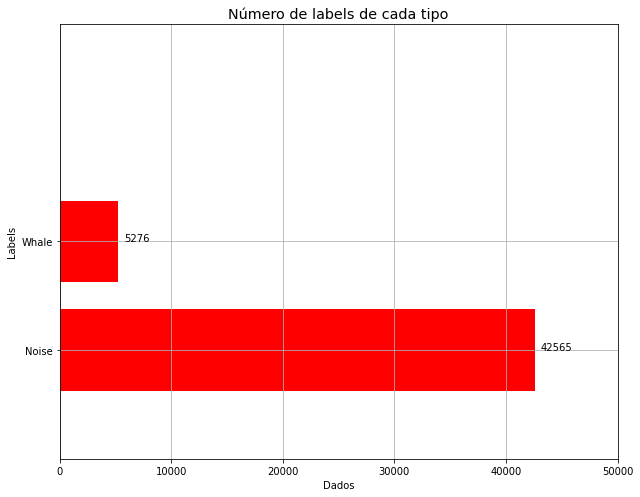

In [ ]:
#carregar arquivo com classlabels
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mestrado/joão carlos/labels/file_classes_ok.csv")
print(labels.groupby(['classe']).count())
print(len(labels))

whale = 0
noise = 0

LBL = labels['classe']
for item in LBL:
  if item == 'whale':
    whale = whale+1
  elif item == 'noise':
    noise = noise+1

Xaxis = [noise, whale]
Yaxis = ['Noise', 'Whale']

fig = plt.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)
ax.axis([0,50000, -1, 3])

width = 0.75
ax.barh(Yaxis, Xaxis, width, color="red")
for i, v in enumerate(Xaxis):
    ax.text(v+500, i, str(v), color='black')
plt.style.use('ggplot')
plt.grid()
plt.title("Número de labels de cada tipo")
plt.xlabel('Dados')
plt.ylabel('Labels')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/mestrado/joão carlos/images/balancing_data.png', format='png')
plt.show()

In [ ]:
labels['classe'] = np.where(labels['classe']=="noise", 0, 1)
labels['classe'].describe()

count    47841.000000
mean         0.110282
std          0.313244
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: classe, dtype: float64

In [ ]:
#usar dataset preparado com jAudio
#for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/mestrado/joão carlos/dataset_1_MFCC/DATABASE.csv'):
df0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mestrado/joão carlos/dataset_1_MFCC/DATABASE.csv')
df0.describe()
print(len(df0))
print(df0.columns)

47841
Index(['MFCC Overall Standard Deviation0', 'MFCC Overall Standard Deviation1',
       'MFCC Overall Standard Deviation2', 'MFCC Overall Standard Deviation3',
       'MFCC Overall Standard Deviation4', 'MFCC Overall Standard Deviation5',
       'MFCC Overall Standard Deviation6', 'MFCC Overall Standard Deviation7',
       'MFCC Overall Standard Deviation8', 'MFCC Overall Standard Deviation9',
       ...
       'Derivative of Standard Deviation of MFCC Overall Average3',
       'Derivative of Standard Deviation of MFCC Overall Average4',
       'Derivative of Standard Deviation of MFCC Overall Average5',
       'Derivative of Standard Deviation of MFCC Overall Average6',
       'Derivative of Standard Deviation of MFCC Overall Average7',
       'Derivative of Standard Deviation of MFCC Overall Average8',
       'Derivative of Standard Deviation of MFCC Overall Average9',
       'Derivative of Standard Deviation of MFCC Overall Average10',
       'Derivative of Standard Deviation of

In [ ]:
df = df0.copy()
df.describe()

,MFCC Overall Standard Deviation0,MFCC Overall Standard Deviation1,MFCC Overall Standard Deviation2,MFCC Overall Standard Deviation3,MFCC Overall Standard Deviation4,MFCC Overall Standard Deviation5,MFCC Overall Standard Deviation6,MFCC Overall Standard Deviation7,MFCC Overall Standard Deviation8,MFCC Overall Standard Deviation9,MFCC Overall Standard Deviation10,MFCC Overall Standard Deviation11,MFCC Overall Standard Deviation12,Derivative of MFCC Overall Standard Deviation0,Derivative of MFCC Overall Standard Deviation1,Derivative of MFCC Overall Standard Deviation2,Derivative of MFCC Overall Standard Deviation3,Derivative of MFCC Overall Standard Deviation4,Derivative of MFCC Overall Standard Deviation5,Derivative of MFCC Overall Standard Deviation6,Derivative of MFCC Overall Standard Deviation7,Derivative of MFCC Overall Standard Deviation8,Derivative of MFCC Overall Standard Deviation9,Derivative of MFCC Overall Standard Deviation10,Derivative of MFCC Overall Standard Deviation11,Derivative of MFCC Overall Standard Deviation12,Running Mean of MFCC Overall Standard Deviation0,Running Mean of MFCC Overall Standard Deviation1,Running Mean of MFCC Overall Standard Deviation2,Running Mean of MFCC Overall Standard Deviation3,Running Mean of MFCC Overall Standard Deviation4,Running Mean of MFCC Overall Standard Deviation5,Running Mean of MFCC Overall Standard Deviation6,Running Mean of MFCC Overall Standard Deviation7,Running Mean of MFCC Overall Standard Deviation8,Running Mean of MFCC Overall Standard Deviation9,Running Mean of MFCC Overall Standard Deviation10,Running Mean of MFCC Overall Standard Deviation11,Running Mean of MFCC Overall Standard Deviation12,Standard Deviation of MFCC Overall Standard Deviation0,...,Running Mean of MFCC Overall Average12,Standard Deviation of MFCC Overall Average0,Standard Deviation of MFCC Overall Average1,Standard Deviation of MFCC Overall Average2,Standard Deviation of MFCC Overall Average3,Standard Deviation of MFCC Overall Average4,Standard Deviation of MFCC Overall Average5,Standard Deviation of MFCC Overall Average6,Standard Deviation of MFCC Overall Average7,Standard Deviation of MFCC Overall Average8,Standard Deviation of MFCC Overall Average9,Standard Deviation of MFCC Overall Average10,Standard Deviation of MFCC Overall Average11,Standard Deviation of MFCC Overall Average12,Derivative of Running Mean of MFCC Overall Average0,Derivative of Running Mean of MFCC Overall Average1,Derivative of Running Mean of MFCC Overall Average2,Derivative of Running Mean of MFCC Overall Average3,Derivative of Running Mean of MFCC Overall Average4,Derivative of Running Mean of MFCC Overall Average5,Derivative of Running Mean of MFCC Overall Average6,Derivative of Running Mean of MFCC Overall Average7,Derivative of Running Mean of MFCC Overall Average8,Derivative of Running Mean of MFCC Overall Average9,Derivative of Running Mean of MFCC Overall Average10,Derivative of Running Mean of MFCC Overall Average11,Derivative of Running Mean of MFCC Overall Average12,Derivative of Standard Deviation of MFCC Overall Average0,Derivative of Standard Deviation of MFCC Overall Average1,Derivative of Standard Deviation of MFCC Overall Average2,Derivative of Standard Deviation of MFCC Overall Average3,Derivative of Standard Deviation of MFCC Overall Average4,Derivative of Standard Deviation of MFCC Overall Average5,Derivative of Standard Deviation of MFCC Overall Average6,Derivative of Standard Deviation of MFCC Overall Average7,Derivative of Standard Deviation of MFCC Overall Average8,Derivative of Standard Deviation of MFCC Overall Average9,Derivative of Standard Deviation of MFCC Overall Average10,Derivative of Standard Deviation of MFCC Overall Average11,Derivative of Standard Deviation of MFCC Overall Average12
count,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.00000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,4784

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
print(df.isnull())
for column in df.columns:
  df[column].replace('None', np.NaN, inplace=True)
  df[column] = imp.fit_transform(df[column].values.reshape(-1,1))[:,0]
df.duplicated().sum()
df.describe()

       MFCC Overall Standard Deviation0  ...  Derivative of Standard Deviation of MFCC Overall Average12
0                                 False  ...                                              False         
1                                 False  ...                                              False         
2                                 False  ...                                              False         
3                                 False  ...                                              False         
4                                 False  ...                                              False         
...                                 ...  ...                                                ...         
47836                             False  ...                                              False         
47837                             False  ...                                              False         
47838                             False  ...           

,MFCC Overall Standard Deviation0,MFCC Overall Standard Deviation1,MFCC Overall Standard Deviation2,MFCC Overall Standard Deviation3,MFCC Overall Standard Deviation4,MFCC Overall Standard Deviation5,MFCC Overall Standard Deviation6,MFCC Overall Standard Deviation7,MFCC Overall Standard Deviation8,MFCC Overall Standard Deviation9,MFCC Overall Standard Deviation10,MFCC Overall Standard Deviation11,MFCC Overall Standard Deviation12,Derivative of MFCC Overall Standard Deviation0,Derivative of MFCC Overall Standard Deviation1,Derivative of MFCC Overall Standard Deviation2,Derivative of MFCC Overall Standard Deviation3,Derivative of MFCC Overall Standard Deviation4,Derivative of MFCC Overall Standard Deviation5,Derivative of MFCC Overall Standard Deviation6,Derivative of MFCC Overall Standard Deviation7,Derivative of MFCC Overall Standard Deviation8,Derivative of MFCC Overall Standard Deviation9,Derivative of MFCC Overall Standard Deviation10,Derivative of MFCC Overall Standard Deviation11,Derivative of MFCC Overall Standard Deviation12,Running Mean of MFCC Overall Standard Deviation0,Running Mean of MFCC Overall Standard Deviation1,Running Mean of MFCC Overall Standard Deviation2,Running Mean of MFCC Overall Standard Deviation3,Running Mean of MFCC Overall Standard Deviation4,Running Mean of MFCC Overall Standard Deviation5,Running Mean of MFCC Overall Standard Deviation6,Running Mean of MFCC Overall Standard Deviation7,Running Mean of MFCC Overall Standard Deviation8,Running Mean of MFCC Overall Standard Deviation9,Running Mean of MFCC Overall Standard Deviation10,Running Mean of MFCC Overall Standard Deviation11,Running Mean of MFCC Overall Standard Deviation12,Standard Deviation of MFCC Overall Standard Deviation0,...,Running Mean of MFCC Overall Average12,Standard Deviation of MFCC Overall Average0,Standard Deviation of MFCC Overall Average1,Standard Deviation of MFCC Overall Average2,Standard Deviation of MFCC Overall Average3,Standard Deviation of MFCC Overall Average4,Standard Deviation of MFCC Overall Average5,Standard Deviation of MFCC Overall Average6,Standard Deviation of MFCC Overall Average7,Standard Deviation of MFCC Overall Average8,Standard Deviation of MFCC Overall Average9,Standard Deviation of MFCC Overall Average10,Standard Deviation of MFCC Overall Average11,Standard Deviation of MFCC Overall Average12,Derivative of Running Mean of MFCC Overall Average0,Derivative of Running Mean of MFCC Overall Average1,Derivative of Running Mean of MFCC Overall Average2,Derivative of Running Mean of MFCC Overall Average3,Derivative of Running Mean of MFCC Overall Average4,Derivative of Running Mean of MFCC Overall Average5,Derivative of Running Mean of MFCC Overall Average6,Derivative of Running Mean of MFCC Overall Average7,Derivative of Running Mean of MFCC Overall Average8,Derivative of Running Mean of MFCC Overall Average9,Derivative of Running Mean of MFCC Overall Average10,Derivative of Running Mean of MFCC Overall Average11,Derivative of Running Mean of MFCC Overall Average12,Derivative of Standard Deviation of MFCC Overall Average0,Derivative of Standard Deviation of MFCC Overall Average1,Derivative of Standard Deviation of MFCC Overall Average2,Derivative of Standard Deviation of MFCC Overall Average3,Derivative of Standard Deviation of MFCC Overall Average4,Derivative of Standard Deviation of MFCC Overall Average5,Derivative of Standard Deviation of MFCC Overall Average6,Derivative of Standard Deviation of MFCC Overall Average7,Derivative of Standard Deviation of MFCC Overall Average8,Derivative of Standard Deviation of MFCC Overall Average9,Derivative of Standard Deviation of MFCC Overall Average10,Derivative of Standard Deviation of MFCC Overall Average11,Derivative of Standard Deviation of MFCC Overall Average12
count,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.00000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,4784

In [ ]:
labels['classe'].replace('None', np.NaN, inplace=True)
labels['classe'] = imp.fit_transform(labels['classe'].values.reshape(-1,1))[:,0]
labels.describe()

,classe,Unnamed: 2
count,47841.000000,0.0
mean,0.110282,NaN
std,0.313244,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN
max,1.000000,NaN


In [ ]:
import pandas as pd
from sklearn import preprocessing
df1 = df.copy()

# create a scaler object
#std_scaler = StandardScaler()
#std_scaler
# fit and transform the data
#df_std = pd.DataFrame(std_scaler.fit_transform(df), columns = df.columns)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = pd.DataFrame(min_max_scaler.fit_transform(df1), columns = df1.columns)
df1 = x_scaled.copy()

In [ ]:
df1.describe()

,MFCC Overall Standard Deviation0,MFCC Overall Standard Deviation1,MFCC Overall Standard Deviation2,MFCC Overall Standard Deviation3,MFCC Overall Standard Deviation4,MFCC Overall Standard Deviation5,MFCC Overall Standard Deviation6,MFCC Overall Standard Deviation7,MFCC Overall Standard Deviation8,MFCC Overall Standard Deviation9,MFCC Overall Standard Deviation10,MFCC Overall Standard Deviation11,MFCC Overall Standard Deviation12,Derivative of MFCC Overall Standard Deviation0,Derivative of MFCC Overall Standard Deviation1,Derivative of MFCC Overall Standard Deviation2,Derivative of MFCC Overall Standard Deviation3,Derivative of MFCC Overall Standard Deviation4,Derivative of MFCC Overall Standard Deviation5,Derivative of MFCC Overall Standard Deviation6,Derivative of MFCC Overall Standard Deviation7,Derivative of MFCC Overall Standard Deviation8,Derivative of MFCC Overall Standard Deviation9,Derivative of MFCC Overall Standard Deviation10,Derivative of MFCC Overall Standard Deviation11,Derivative of MFCC Overall Standard Deviation12,Running Mean of MFCC Overall Standard Deviation0,Running Mean of MFCC Overall Standard Deviation1,Running Mean of MFCC Overall Standard Deviation2,Running Mean of MFCC Overall Standard Deviation3,Running Mean of MFCC Overall Standard Deviation4,Running Mean of MFCC Overall Standard Deviation5,Running Mean of MFCC Overall Standard Deviation6,Running Mean of MFCC Overall Standard Deviation7,Running Mean of MFCC Overall Standard Deviation8,Running Mean of MFCC Overall Standard Deviation9,Running Mean of MFCC Overall Standard Deviation10,Running Mean of MFCC Overall Standard Deviation11,Running Mean of MFCC Overall Standard Deviation12,Standard Deviation of MFCC Overall Standard Deviation0,...,Running Mean of MFCC Overall Average12,Standard Deviation of MFCC Overall Average0,Standard Deviation of MFCC Overall Average1,Standard Deviation of MFCC Overall Average2,Standard Deviation of MFCC Overall Average3,Standard Deviation of MFCC Overall Average4,Standard Deviation of MFCC Overall Average5,Standard Deviation of MFCC Overall Average6,Standard Deviation of MFCC Overall Average7,Standard Deviation of MFCC Overall Average8,Standard Deviation of MFCC Overall Average9,Standard Deviation of MFCC Overall Average10,Standard Deviation of MFCC Overall Average11,Standard Deviation of MFCC Overall Average12,Derivative of Running Mean of MFCC Overall Average0,Derivative of Running Mean of MFCC Overall Average1,Derivative of Running Mean of MFCC Overall Average2,Derivative of Running Mean of MFCC Overall Average3,Derivative of Running Mean of MFCC Overall Average4,Derivative of Running Mean of MFCC Overall Average5,Derivative of Running Mean of MFCC Overall Average6,Derivative of Running Mean of MFCC Overall Average7,Derivative of Running Mean of MFCC Overall Average8,Derivative of Running Mean of MFCC Overall Average9,Derivative of Running Mean of MFCC Overall Average10,Derivative of Running Mean of MFCC Overall Average11,Derivative of Running Mean of MFCC Overall Average12,Derivative of Standard Deviation of MFCC Overall Average0,Derivative of Standard Deviation of MFCC Overall Average1,Derivative of Standard Deviation of MFCC Overall Average2,Derivative of Standard Deviation of MFCC Overall Average3,Derivative of Standard Deviation of MFCC Overall Average4,Derivative of Standard Deviation of MFCC Overall Average5,Derivative of Standard Deviation of MFCC Overall Average6,Derivative of Standard Deviation of MFCC Overall Average7,Derivative of Standard Deviation of MFCC Overall Average8,Derivative of Standard Deviation of MFCC Overall Average9,Derivative of Standard Deviation of MFCC Overall Average10,Derivative of Standard Deviation of MFCC Overall Average11,Derivative of Standard Deviation of MFCC Overall Average12
count,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,478

# **Pré-Processamento**

In [ ]:
df1['Labels'] = labels['classe']
df['Labels'] = labels['classe']
df0['Labels'] = labels['classe']

In [ ]:
#df.duplicated().sum()
#df = df.dropna(axis=0, how="any")
#df.dropna(thresh=75, inplace=True)
#print('df: {}'.format(df))

from sklearn.impute import SimpleImputer
df.duplicated().sum()
df2 = df1.copy()

imp = SimpleImputer(missing_values=np.NaN, strategy='median')
for column in df2.columns:
  df2[column] = imp.fit_transform(df2[column].values.reshape(-1,1))[:,0]



In [ ]:
print(df2.info())
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47841 entries, 0 to 47840
Columns: 157 entries, MFCC Overall Standard Deviation0 to Labels
dtypes: float64(157)
memory usage: 57.3 MB
None


,MFCC Overall Standard Deviation0,MFCC Overall Standard Deviation1,MFCC Overall Standard Deviation2,MFCC Overall Standard Deviation3,MFCC Overall Standard Deviation4,MFCC Overall Standard Deviation5,MFCC Overall Standard Deviation6,MFCC Overall Standard Deviation7,MFCC Overall Standard Deviation8,MFCC Overall Standard Deviation9,MFCC Overall Standard Deviation10,MFCC Overall Standard Deviation11,MFCC Overall Standard Deviation12,Derivative of MFCC Overall Standard Deviation0,Derivative of MFCC Overall Standard Deviation1,Derivative of MFCC Overall Standard Deviation2,Derivative of MFCC Overall Standard Deviation3,Derivative of MFCC Overall Standard Deviation4,Derivative of MFCC Overall Standard Deviation5,Derivative of MFCC Overall Standard Deviation6,Derivative of MFCC Overall Standard Deviation7,Derivative of MFCC Overall Standard Deviation8,Derivative of MFCC Overall Standard Deviation9,Derivative of MFCC Overall Standard Deviation10,Derivative of MFCC Overall Standard Deviation11,Derivative of MFCC Overall Standard Deviation12,Running Mean of MFCC Overall Standard Deviation0,Running Mean of MFCC Overall Standard Deviation1,Running Mean of MFCC Overall Standard Deviation2,Running Mean of MFCC Overall Standard Deviation3,Running Mean of MFCC Overall Standard Deviation4,Running Mean of MFCC Overall Standard Deviation5,Running Mean of MFCC Overall Standard Deviation6,Running Mean of MFCC Overall Standard Deviation7,Running Mean of MFCC Overall Standard Deviation8,Running Mean of MFCC Overall Standard Deviation9,Running Mean of MFCC Overall Standard Deviation10,Running Mean of MFCC Overall Standard Deviation11,Running Mean of MFCC Overall Standard Deviation12,Standard Deviation of MFCC Overall Standard Deviation0,...,Standard Deviation of MFCC Overall Average0,Standard Deviation of MFCC Overall Average1,Standard Deviation of MFCC Overall Average2,Standard Deviation of MFCC Overall Average3,Standard Deviation of MFCC Overall Average4,Standard Deviation of MFCC Overall Average5,Standard Deviation of MFCC Overall Average6,Standard Deviation of MFCC Overall Average7,Standard Deviation of MFCC Overall Average8,Standard Deviation of MFCC Overall Average9,Standard Deviation of MFCC Overall Average10,Standard Deviation of MFCC Overall Average11,Standard Deviation of MFCC Overall Average12,Derivative of Running Mean of MFCC Overall Average0,Derivative of Running Mean of MFCC Overall Average1,Derivative of Running Mean of MFCC Overall Average2,Derivative of Running Mean of MFCC Overall Average3,Derivative of Running Mean of MFCC Overall Average4,Derivative of Running Mean of MFCC Overall Average5,Derivative of Running Mean of MFCC Overall Average6,Derivative of Running Mean of MFCC Overall Average7,Derivative of Running Mean of MFCC Overall Average8,Derivative of Running Mean of MFCC Overall Average9,Derivative of Running Mean of MFCC Overall Average10,Derivative of Running Mean of MFCC Overall Average11,Derivative of Running Mean of MFCC Overall Average12,Derivative of Standard Deviation of MFCC Overall Average0,Derivative of Standard Deviation of MFCC Overall Average1,Derivative of Standard Deviation of MFCC Overall Average2,Derivative of Standard Deviation of MFCC Overall Average3,Derivative of Standard Deviation of MFCC Overall Average4,Derivative of Standard Deviation of MFCC Overall Average5,Derivative of Standard Deviation of MFCC Overall Average6,Derivative of Standard Deviation of MFCC Overall Average7,Derivative of Standard Deviation of MFCC Overall Average8,Derivative of Standard Deviation of MFCC Overall Average9,Derivative of Standard Deviation of MFCC Overall Average10,Derivative of Standard Deviation of MFCC Overall Average11,Derivative of Standard Deviation of MFCC Overall Average12,Labels
count,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000

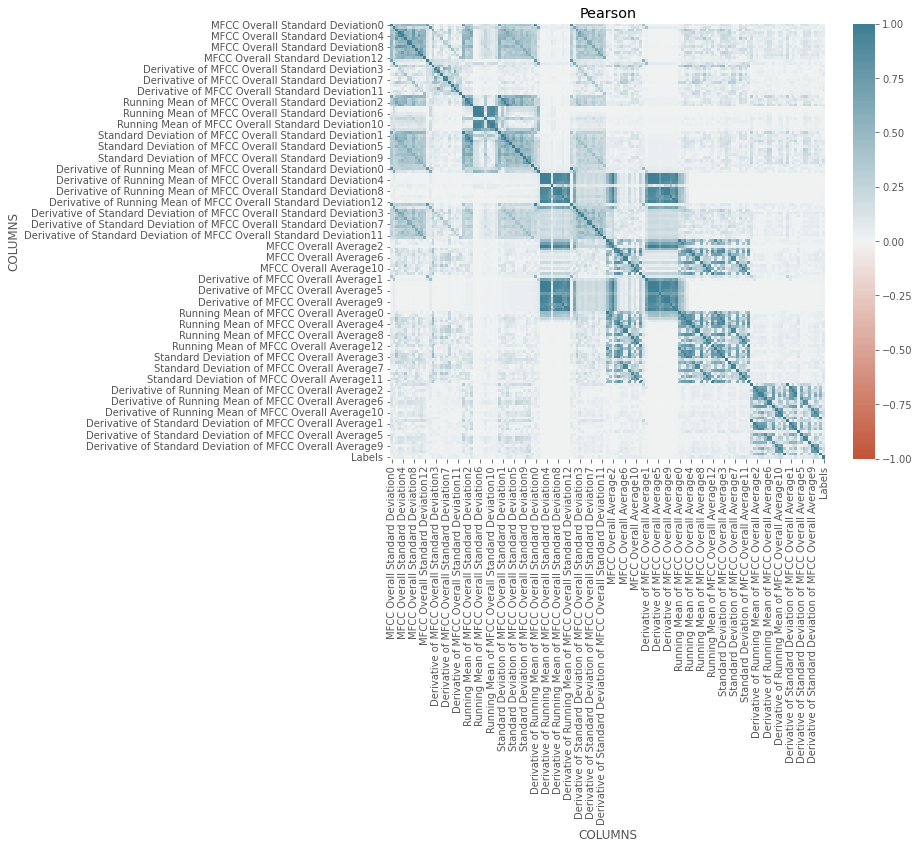

       MFCC Overall Standard Deviation0  ...  Labels
0                                 6.332  ...     0.0
1                                 6.203  ...     0.0
2                                 6.297  ...     0.0
3                                 6.546  ...     0.0
4                                 6.021  ...     0.0
...                                 ...  ...     ...
47836                             5.369  ...     0.0
47837                             5.379  ...     0.0
47838                             5.674  ...     0.0
47839                             5.412  ...     0.0
47840                             5.573  ...     0.0

[47841 rows x 157 columns]


In [ ]:
#sol = (corrSpearman.where(np.triu(np.ones(corrSpearman.shape), k=1).astype(np.bool))
#                  .stack()
#                  .sort_values(ascending=False))
#for index, value in sol.items():
#  print(value)
#sns.heatmap(corrSpearman,annot=False,cmap='RdYlGn', vmin=-1, vmax=+1)
figure = plt.figure(figsize=(10,8))
corrPearson = df2.corr(method="pearson").abs()
x = sns.heatmap(
    corrPearson, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    verticalalignment = 'top',
    horizontalalignment='right'
);

plt.title("Pearson")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/mestrado/joão carlos/images/correlation_data.png', format='png')
plt.show()
print(df)

In [ ]:
#criando terceiro dataset
df_new = df2.copy()
correlated_features = set()

correlation_matrix = df_new.corr(method="spearman").abs()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (abs(correlation_matrix.iloc[i, j]) > 0.7):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)
#df_new.drop(labels = correlated_features, axis = 1, inplace = True)
df_new.drop(columns = correlated_features)

df_new.info()

{'Standard Deviation of MFCC Overall Standard Deviation11', 'Derivative of Running Mean of MFCC Overall Standard Deviation2', 'Standard Deviation of MFCC Overall Average12', 'Standard Deviation of MFCC Overall Standard Deviation5', 'Derivative of Standard Deviation of MFCC Overall Standard Deviation10', 'Derivative of Running Mean of MFCC Overall Average11', 'Derivative of Running Mean of MFCC Overall Average3', 'Running Mean of MFCC Overall Average5', 'Running Mean of MFCC Overall Average6', 'MFCC Overall Standard Deviation5', 'Derivative of Standard Deviation of MFCC Overall Standard Deviation5', 'Running Mean of MFCC Overall Average8', 'Derivative of Running Mean of MFCC Overall Standard Deviation8', 'Running Mean of MFCC Overall Average2', 'Running Mean of MFCC Overall Standard Deviation2', 'Standard Deviation of MFCC Overall Standard Deviation4', 'Derivative of Standard Deviation of MFCC Overall Average11', 'Derivative of Standard Deviation of MFCC Overall Standard Deviation8', 'D

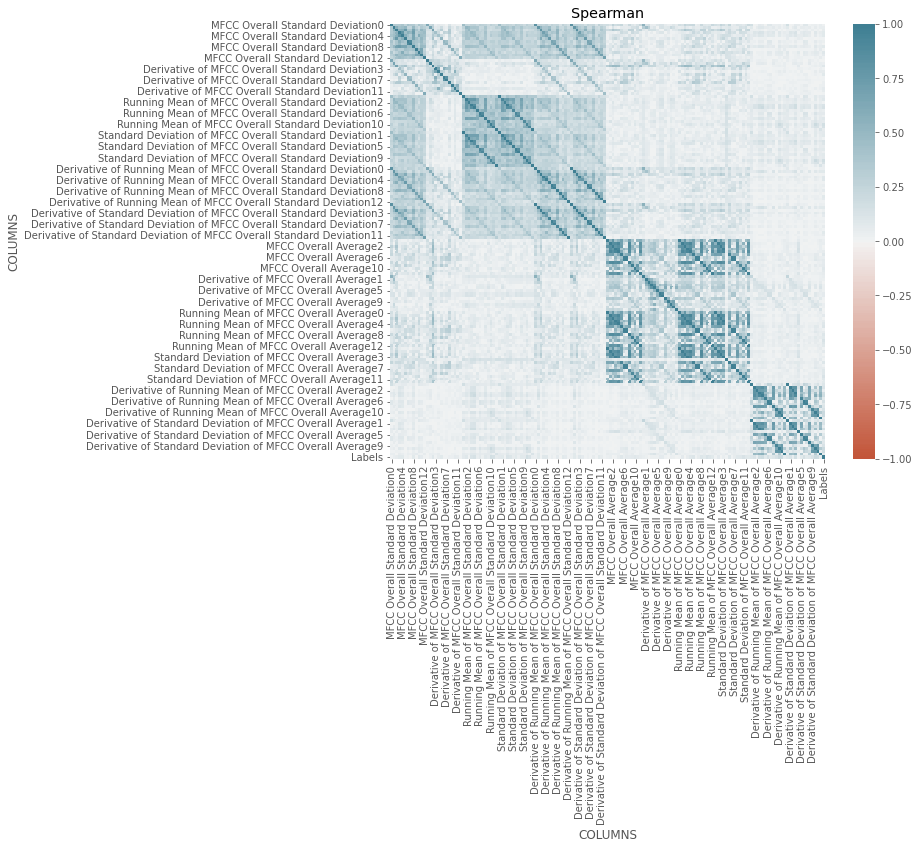

In [ ]:
figure = plt.figure(figsize=(10,8))
corrSpearman = df_new.corr(method="spearman").abs()
x = sns.heatmap(
    corrSpearman, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    verticalalignment = 'top',
    horizontalalignment='right'
);

plt.title("Spearman")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/mestrado/joão carlos/images/correlation_data_spearman.png', format='png')
plt.show()


In [ ]:
#criando terceiro dataset
df_new1 = df2.copy()
correlated_features = set()

correlation_matrix = df_new1.corr(method="pearson").abs()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

len(correlated_features)
print(correlated_features)
df_new1.drop(labels = correlated_features, axis = 1, inplace = True)

df_new1.info()

{'Running Mean of MFCC Overall Standard Deviation12', 'MFCC Overall Standard Deviation10', 'Standard Deviation of MFCC Overall Standard Deviation11', 'Standard Deviation of MFCC Overall Average12', 'Standard Deviation of MFCC Overall Standard Deviation5', 'Derivative of Running Mean of MFCC Overall Average11', 'Derivative of Running Mean of MFCC Overall Average3', 'Running Mean of MFCC Overall Average5', 'Running Mean of MFCC Overall Average6', 'MFCC Overall Standard Deviation5', 'Running Mean of MFCC Overall Average8', 'Derivative of Running Mean of MFCC Overall Standard Deviation8', 'Running Mean of MFCC Overall Average2', 'Derivative of MFCC Overall Average6', 'Running Mean of MFCC Overall Standard Deviation2', 'Derivative of MFCC Overall Average8', 'MFCC Overall Standard Deviation11', 'MFCC Overall Average10', 'Derivative of Standard Deviation of MFCC Overall Average11', 'Derivative of Standard Deviation of MFCC Overall Standard Deviation3', 'Standard Deviation of MFCC Overall Aver

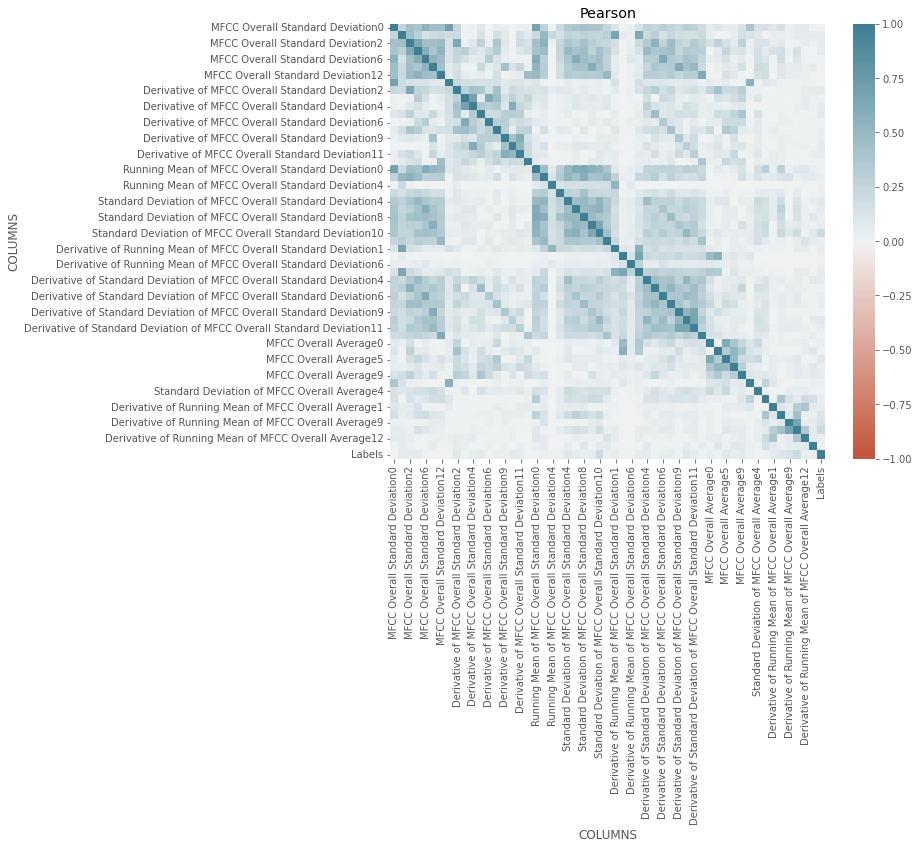

In [ ]:
#sol = (corrSpearman.where(np.triu(np.ones(corrSpearman.shape), k=1).astype(np.bool))
#                  .stack()
#                  .sort_values(ascending=False))
#for index, value in sol.items():
#  print(value)
#sns.heatmap(corrSpearman,annot=False,cmap='RdYlGn', vmin=-1, vmax=+1)
#correlate = correlation(df2, 1)

figure = plt.figure(figsize=(10,8))
corrPearson = df_new1.corr(method="pearson").abs()
x = sns.heatmap(
    corrPearson, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    verticalalignment = 'top',
    horizontalalignment='right'
);

plt.title("Pearson")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/mestrado/joão carlos/images/correlation_data_pearson.png', format='png')
plt.show()

In [ ]:
df_new.describe()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47841 entries, 0 to 47840
Columns: 157 entries, MFCC Overall Standard Deviation0 to Labels
dtypes: float64(157)
memory usage: 57.3 MB


In [ ]:
df_new1.describe()
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47841 entries, 0 to 47840
Data columns (total 55 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   MFCC Overall Standard Deviation0                                       47841 non-null  float64
 1   MFCC Overall Standard Deviation1                                       47841 non-null  float64
 2   MFCC Overall Standard Deviation2                                       47841 non-null  float64
 3   MFCC Overall Standard Deviation3                                       47841 non-null  float64
 4   MFCC Overall Standard Deviation6                                       47841 non-null  float64
 5   MFCC Overall Standard Deviation9                                       47841 non-null  float64
 6   MFCC Overall Standard Deviation12                                      47841 non-null 

In [ ]:
#criando terceiro dataset
#column_names = list(df_new.columns)
#df2 = df2.loc[:, column_names]
#print(df2.info())


In [ ]:
df3 = df_new1.copy()

In [ ]:
df4 = df3.copy()
df4.describe()

,MFCC Overall Standard Deviation0,MFCC Overall Standard Deviation1,MFCC Overall Standard Deviation2,MFCC Overall Standard Deviation3,MFCC Overall Standard Deviation6,MFCC Overall Standard Deviation9,MFCC Overall Standard Deviation12,Derivative of MFCC Overall Standard Deviation0,Derivative of MFCC Overall Standard Deviation2,Derivative of MFCC Overall Standard Deviation3,Derivative of MFCC Overall Standard Deviation4,Derivative of MFCC Overall Standard Deviation5,Derivative of MFCC Overall Standard Deviation6,Derivative of MFCC Overall Standard Deviation8,Derivative of MFCC Overall Standard Deviation9,Derivative of MFCC Overall Standard Deviation10,Derivative of MFCC Overall Standard Deviation11,Derivative of MFCC Overall Standard Deviation12,Running Mean of MFCC Overall Standard Deviation0,Running Mean of MFCC Overall Standard Deviation1,Running Mean of MFCC Overall Standard Deviation4,Running Mean of MFCC Overall Standard Deviation8,Standard Deviation of MFCC Overall Standard Deviation4,Standard Deviation of MFCC Overall Standard Deviation6,Standard Deviation of MFCC Overall Standard Deviation8,Standard Deviation of MFCC Overall Standard Deviation9,Standard Deviation of MFCC Overall Standard Deviation10,Standard Deviation of MFCC Overall Standard Deviation12,Derivative of Running Mean of MFCC Overall Standard Deviation1,Derivative of Running Mean of MFCC Overall Standard Deviation2,Derivative of Running Mean of MFCC Overall Standard Deviation6,Derivative of Standard Deviation of MFCC Overall Standard Deviation1,Derivative of Standard Deviation of MFCC Overall Standard Deviation4,Derivative of Standard Deviation of MFCC Overall Standard Deviation5,Derivative of Standard Deviation of MFCC Overall Standard Deviation6,Derivative of Standard Deviation of MFCC Overall Standard Deviation8,Derivative of Standard Deviation of MFCC Overall Standard Deviation9,Derivative of Standard Deviation of MFCC Overall Standard Deviation10,Derivative of Standard Deviation of MFCC Overall Standard Deviation11,Derivative of Standard Deviation of MFCC Overall Standard Deviation12,MFCC Overall Average0,MFCC Overall Average3,MFCC Overall Average5,MFCC Overall Average6,MFCC Overall Average9,Derivative of MFCC Overall Average0,Standard Deviation of MFCC Overall Average4,Derivative of Running Mean of MFCC Overall Average0,Derivative of Running Mean of MFCC Overall Average1,Derivative of Running Mean of MFCC Overall Average6,Derivative of Running Mean of MFCC Overall Average9,Derivative of Running Mean of MFCC Overall Average10,Derivative of Running Mean of MFCC Overall Average12,Derivative of Standard Deviation of MFCC Overall Average4,Labels
count,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000
mean,0.011387,0.325258,0.032438,0.039436,0.042380,0.036509,0.047003,0.044586,0.113283,0.286050,0.300611,0.129655,0.241805,0.161535,0.226750,0.250527,0.140099,0.241371,0.005226,0.065081,0.962188,0.407009,0.063205,0.027168,0.017224,0.019343,0.031480,0.082800,0.533747,0.998828,0.412779,0.736303,0.234690,0.150561,0.224613,0.169360,0.197652,0.226249,0.148707,0.325421,0.506834,0.161470,0.271398,0.364881,0.222581,0.761978,0.107650,0.361432,0.854874,0.747601,0.807153,0.701424,0.748736,0.748799,0.110282
std,0.010953,0.081359,0.014693,0.016738,0.016941,0.010867,0.012723,0.020700,0.031335,0.046367,0.043883,0.026458,0.03

In [ ]:
import statistics
df4 = df3.copy()
df4.sort_index()
for column in df4.columns:
  if column != 'Labels':
    col = sorted(df4[column])
    Q1 =  df4[column].quantile(0.25)
    Q3 =  df4[column].quantile(0.75)
    IQR = Q3 - Q1
    down = Q1-(1.5*IQR)
    up = Q3+(1.5*IQR)
    moda = statistics.median(df4[column])
    df4[column]=np.where(df4[column] < down, moda, np.where(df4[column] > up, moda, df4[column]))

In [ ]:
df4.describe()

,MFCC Overall Standard Deviation0,MFCC Overall Standard Deviation1,MFCC Overall Standard Deviation2,MFCC Overall Standard Deviation3,MFCC Overall Standard Deviation6,MFCC Overall Standard Deviation9,MFCC Overall Standard Deviation12,Derivative of MFCC Overall Standard Deviation0,Derivative of MFCC Overall Standard Deviation2,Derivative of MFCC Overall Standard Deviation3,Derivative of MFCC Overall Standard Deviation4,Derivative of MFCC Overall Standard Deviation5,Derivative of MFCC Overall Standard Deviation6,Derivative of MFCC Overall Standard Deviation8,Derivative of MFCC Overall Standard Deviation9,Derivative of MFCC Overall Standard Deviation10,Derivative of MFCC Overall Standard Deviation11,Derivative of MFCC Overall Standard Deviation12,Running Mean of MFCC Overall Standard Deviation0,Running Mean of MFCC Overall Standard Deviation1,Running Mean of MFCC Overall Standard Deviation4,Running Mean of MFCC Overall Standard Deviation8,Standard Deviation of MFCC Overall Standard Deviation4,Standard Deviation of MFCC Overall Standard Deviation6,Standard Deviation of MFCC Overall Standard Deviation8,Standard Deviation of MFCC Overall Standard Deviation9,Standard Deviation of MFCC Overall Standard Deviation10,Standard Deviation of MFCC Overall Standard Deviation12,Derivative of Running Mean of MFCC Overall Standard Deviation1,Derivative of Running Mean of MFCC Overall Standard Deviation2,Derivative of Running Mean of MFCC Overall Standard Deviation6,Derivative of Standard Deviation of MFCC Overall Standard Deviation1,Derivative of Standard Deviation of MFCC Overall Standard Deviation4,Derivative of Standard Deviation of MFCC Overall Standard Deviation5,Derivative of Standard Deviation of MFCC Overall Standard Deviation6,Derivative of Standard Deviation of MFCC Overall Standard Deviation8,Derivative of Standard Deviation of MFCC Overall Standard Deviation9,Derivative of Standard Deviation of MFCC Overall Standard Deviation10,Derivative of Standard Deviation of MFCC Overall Standard Deviation11,Derivative of Standard Deviation of MFCC Overall Standard Deviation12,MFCC Overall Average0,MFCC Overall Average3,MFCC Overall Average5,MFCC Overall Average6,MFCC Overall Average9,Derivative of MFCC Overall Average0,Standard Deviation of MFCC Overall Average4,Derivative of Running Mean of MFCC Overall Average0,Derivative of Running Mean of MFCC Overall Average1,Derivative of Running Mean of MFCC Overall Average6,Derivative of Running Mean of MFCC Overall Average9,Derivative of Running Mean of MFCC Overall Average10,Derivative of Running Mean of MFCC Overall Average12,Derivative of Standard Deviation of MFCC Overall Average4,Labels
count,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000
mean,0.009462,0.340201,0.030812,0.036601,0.039649,0.035476,0.045972,0.043107,0.111791,0.284747,0.299791,0.128352,0.241436,0.160587,0.226600,0.250068,0.139959,0.241473,0.003325,0.053011,0.974119,0.405925,0.060397,0.023255,0.015181,0.017364,0.027108,0.074610,0.539895,0.999532,0.412808,0.738934,0.232134,0.149477,0.222728,0.168167,0.196965,0.222654,0.147817,0.324583,0.504159,0.160866,0.275564,0.366538,0.219773,0.764726,0.094632,0.361320,0.854753,0.748566,0.806940,0.701566,0.748699,0.748596,0.110282
std,0.002836,0.024712,0.010375,0.010502,0.010014,0.007404,0.008289,0.007176,0.027898,0.042289,0.040891,0.022966,0.03

In [ ]:
df4.describe()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47841 entries, 0 to 47840
Data columns (total 55 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   MFCC Overall Standard Deviation0                                       47841 non-null  float64
 1   MFCC Overall Standard Deviation1                                       47841 non-null  float64
 2   MFCC Overall Standard Deviation2                                       47841 non-null  float64
 3   MFCC Overall Standard Deviation3                                       47841 non-null  float64
 4   MFCC Overall Standard Deviation6                                       47841 non-null  float64
 5   MFCC Overall Standard Deviation9                                       47841 non-null  float64
 6   MFCC Overall Standard Deviation12                                      47841 non-null 

In [ ]:
df5 = df4.copy()
df5.describe()

,MFCC Overall Standard Deviation0,MFCC Overall Standard Deviation1,MFCC Overall Standard Deviation2,MFCC Overall Standard Deviation3,MFCC Overall Standard Deviation6,MFCC Overall Standard Deviation9,MFCC Overall Standard Deviation12,Derivative of MFCC Overall Standard Deviation0,Derivative of MFCC Overall Standard Deviation2,Derivative of MFCC Overall Standard Deviation3,Derivative of MFCC Overall Standard Deviation4,Derivative of MFCC Overall Standard Deviation5,Derivative of MFCC Overall Standard Deviation6,Derivative of MFCC Overall Standard Deviation8,Derivative of MFCC Overall Standard Deviation9,Derivative of MFCC Overall Standard Deviation10,Derivative of MFCC Overall Standard Deviation11,Derivative of MFCC Overall Standard Deviation12,Running Mean of MFCC Overall Standard Deviation0,Running Mean of MFCC Overall Standard Deviation1,Running Mean of MFCC Overall Standard Deviation4,Running Mean of MFCC Overall Standard Deviation8,Standard Deviation of MFCC Overall Standard Deviation4,Standard Deviation of MFCC Overall Standard Deviation6,Standard Deviation of MFCC Overall Standard Deviation8,Standard Deviation of MFCC Overall Standard Deviation9,Standard Deviation of MFCC Overall Standard Deviation10,Standard Deviation of MFCC Overall Standard Deviation12,Derivative of Running Mean of MFCC Overall Standard Deviation1,Derivative of Running Mean of MFCC Overall Standard Deviation2,Derivative of Running Mean of MFCC Overall Standard Deviation6,Derivative of Standard Deviation of MFCC Overall Standard Deviation1,Derivative of Standard Deviation of MFCC Overall Standard Deviation4,Derivative of Standard Deviation of MFCC Overall Standard Deviation5,Derivative of Standard Deviation of MFCC Overall Standard Deviation6,Derivative of Standard Deviation of MFCC Overall Standard Deviation8,Derivative of Standard Deviation of MFCC Overall Standard Deviation9,Derivative of Standard Deviation of MFCC Overall Standard Deviation10,Derivative of Standard Deviation of MFCC Overall Standard Deviation11,Derivative of Standard Deviation of MFCC Overall Standard Deviation12,MFCC Overall Average0,MFCC Overall Average3,MFCC Overall Average5,MFCC Overall Average6,MFCC Overall Average9,Derivative of MFCC Overall Average0,Standard Deviation of MFCC Overall Average4,Derivative of Running Mean of MFCC Overall Average0,Derivative of Running Mean of MFCC Overall Average1,Derivative of Running Mean of MFCC Overall Average6,Derivative of Running Mean of MFCC Overall Average9,Derivative of Running Mean of MFCC Overall Average10,Derivative of Running Mean of MFCC Overall Average12,Derivative of Standard Deviation of MFCC Overall Average4,Labels
count,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000,47841.000000
mean,0.009462,0.340201,0.030812,0.036601,0.039649,0.035476,0.045972,0.043107,0.111791,0.284747,0.299791,0.128352,0.241436,0.160587,0.226600,0.250068,0.139959,0.241473,0.003325,0.053011,0.974119,0.405925,0.060397,0.023255,0.015181,0.017364,0.027108,0.074610,0.539895,0.999532,0.412808,0.738934,0.232134,0.149477,0.222728,0.168167,0.196965,0.222654,0.147817,0.324583,0.504159,0.160866,0.275564,0.366538,0.219773,0.764726,0.094632,0.361320,0.854753,0.748566,0.806940,0.701566,0.748699,0.748596,0.110282
std,0.002836,0.024712,0.010375,0.010502,0.010014,0.007404,0.008289,0.007176,0.027898,0.042289,0.040891,0.022966,0.03

In [ ]:
#criando terceira dataset
#print(df2.info())
#df = df.drop(df[(df['Labels'] == 0) & (df.index > )].index)
index_to_append = np.array(df5[df5['Labels'] == 1].index, copy = True)
index_to_drop = np.array(df5[df5['Labels'] == 0].index, copy = True)
size = (len(index_to_drop)-1)
#print(size)
index_to_drop1 = index_to_drop[5300:size]
#print(index_to_drop1)
#index_to_drop=np.delete(index_to_drop, index_to_drop1)
#print(index_to_drop)
df5.drop(index_to_drop1, inplace = True)
#print(df2.info())

In [ ]:
df5.describe()

,MFCC Overall Standard Deviation0,MFCC Overall Standard Deviation1,MFCC Overall Standard Deviation2,MFCC Overall Standard Deviation3,MFCC Overall Standard Deviation6,MFCC Overall Standard Deviation9,MFCC Overall Standard Deviation12,Derivative of MFCC Overall Standard Deviation0,Derivative of MFCC Overall Standard Deviation2,Derivative of MFCC Overall Standard Deviation3,Derivative of MFCC Overall Standard Deviation4,Derivative of MFCC Overall Standard Deviation5,Derivative of MFCC Overall Standard Deviation6,Derivative of MFCC Overall Standard Deviation8,Derivative of MFCC Overall Standard Deviation9,Derivative of MFCC Overall Standard Deviation10,Derivative of MFCC Overall Standard Deviation11,Derivative of MFCC Overall Standard Deviation12,Running Mean of MFCC Overall Standard Deviation0,Running Mean of MFCC Overall Standard Deviation1,Running Mean of MFCC Overall Standard Deviation4,Running Mean of MFCC Overall Standard Deviation8,Standard Deviation of MFCC Overall Standard Deviation4,Standard Deviation of MFCC Overall Standard Deviation6,Standard Deviation of MFCC Overall Standard Deviation8,Standard Deviation of MFCC Overall Standard Deviation9,Standard Deviation of MFCC Overall Standard Deviation10,Standard Deviation of MFCC Overall Standard Deviation12,Derivative of Running Mean of MFCC Overall Standard Deviation1,Derivative of Running Mean of MFCC Overall Standard Deviation2,Derivative of Running Mean of MFCC Overall Standard Deviation6,Derivative of Standard Deviation of MFCC Overall Standard Deviation1,Derivative of Standard Deviation of MFCC Overall Standard Deviation4,Derivative of Standard Deviation of MFCC Overall Standard Deviation5,Derivative of Standard Deviation of MFCC Overall Standard Deviation6,Derivative of Standard Deviation of MFCC Overall Standard Deviation8,Derivative of Standard Deviation of MFCC Overall Standard Deviation9,Derivative of Standard Deviation of MFCC Overall Standard Deviation10,Derivative of Standard Deviation of MFCC Overall Standard Deviation11,Derivative of Standard Deviation of MFCC Overall Standard Deviation12,MFCC Overall Average0,MFCC Overall Average3,MFCC Overall Average5,MFCC Overall Average6,MFCC Overall Average9,Derivative of MFCC Overall Average0,Standard Deviation of MFCC Overall Average4,Derivative of Running Mean of MFCC Overall Average0,Derivative of Running Mean of MFCC Overall Average1,Derivative of Running Mean of MFCC Overall Average6,Derivative of Running Mean of MFCC Overall Average9,Derivative of Running Mean of MFCC Overall Average10,Derivative of Running Mean of MFCC Overall Average12,Derivative of Standard Deviation of MFCC Overall Average4,Labels
count,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000
mean,0.009155,0.336581,0.028564,0.034393,0.036795,0.034333,0.044545,0.042572,0.108021,0.276846,0.297675,0.129057,0.234956,0.152940,0.224121,0.252164,0.137084,0.238016,0.003406,0.051976,0.974123,0.405658,0.060560,0.022990,0.014876,0.017429,0.027728,0.074210,0.539354,0.999531,0.412722,0.738652,0.231571,0.148732,0.219090,0.165399,0.195362,0.223228,0.146085,0.322210,0.506297,0.169239,0.271150,0.346347,0.224735,0.764888,0.094853,0.361568,0.855647,0.746621,0.805136,0.698787,0.749342,0.748694,0.498818
std,0.002672,0.024899,0.009807,0.010941,0.009823,0.007189,0.008198,0.006575,0.026817,0.039436,0.038612,0.022794,0.03

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


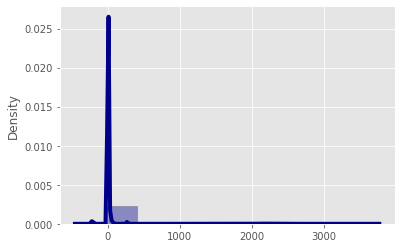

In [ ]:
import matplotlib.pyplot as plt
#df.boxplot()
import seaborn as sns

sns.distplot(df, hist=True, kde=True, 
             bins=int(157/15.7), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


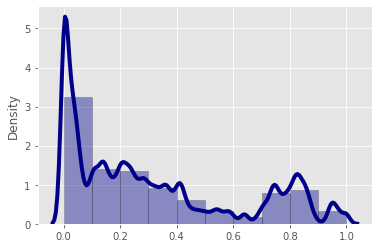

In [ ]:
#df1.boxplot()
import seaborn as sns

sns.distplot(df1, hist=True, kde=True, 
             bins=int(157/15.7), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


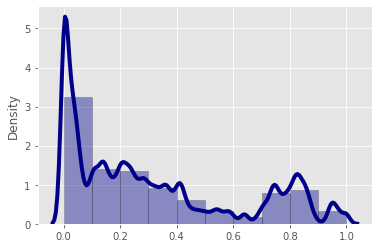

In [ ]:
#df2.boxplot()
import seaborn as sns

sns.distplot(df2, hist=True, kde=True, 
             bins=int(157/15.7), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


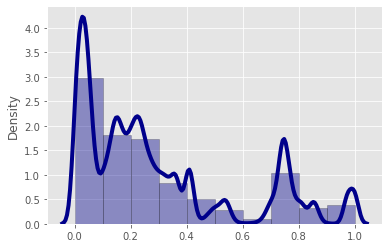

In [ ]:
#df3.boxplot()
import seaborn as sns

sns.distplot(df3, hist=True, kde=True, 
             bins=int(157/15.7), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


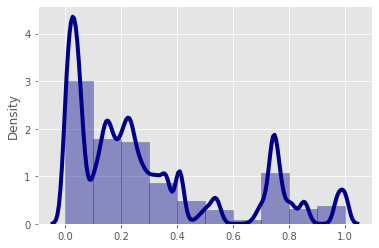

In [ ]:
#df4.boxplot()
import seaborn as sns

sns.distplot(df4, hist=True, kde=True, 
             bins=int(157/15.7), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


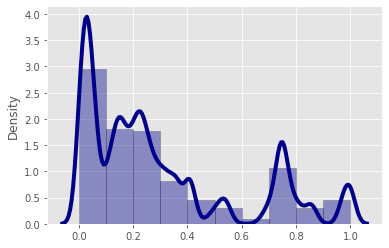

In [ ]:
sns.distplot(df5, hist=True, kde=True, 
             bins=int(157/15.7), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

In [ ]:
df5.describe()

,MFCC Overall Standard Deviation0,MFCC Overall Standard Deviation1,MFCC Overall Standard Deviation2,MFCC Overall Standard Deviation3,MFCC Overall Standard Deviation6,MFCC Overall Standard Deviation9,MFCC Overall Standard Deviation12,Derivative of MFCC Overall Standard Deviation0,Derivative of MFCC Overall Standard Deviation2,Derivative of MFCC Overall Standard Deviation3,Derivative of MFCC Overall Standard Deviation4,Derivative of MFCC Overall Standard Deviation5,Derivative of MFCC Overall Standard Deviation6,Derivative of MFCC Overall Standard Deviation8,Derivative of MFCC Overall Standard Deviation9,Derivative of MFCC Overall Standard Deviation10,Derivative of MFCC Overall Standard Deviation11,Derivative of MFCC Overall Standard Deviation12,Running Mean of MFCC Overall Standard Deviation0,Running Mean of MFCC Overall Standard Deviation1,Running Mean of MFCC Overall Standard Deviation4,Running Mean of MFCC Overall Standard Deviation8,Standard Deviation of MFCC Overall Standard Deviation4,Standard Deviation of MFCC Overall Standard Deviation6,Standard Deviation of MFCC Overall Standard Deviation8,Standard Deviation of MFCC Overall Standard Deviation9,Standard Deviation of MFCC Overall Standard Deviation10,Standard Deviation of MFCC Overall Standard Deviation12,Derivative of Running Mean of MFCC Overall Standard Deviation1,Derivative of Running Mean of MFCC Overall Standard Deviation2,Derivative of Running Mean of MFCC Overall Standard Deviation6,Derivative of Standard Deviation of MFCC Overall Standard Deviation1,Derivative of Standard Deviation of MFCC Overall Standard Deviation4,Derivative of Standard Deviation of MFCC Overall Standard Deviation5,Derivative of Standard Deviation of MFCC Overall Standard Deviation6,Derivative of Standard Deviation of MFCC Overall Standard Deviation8,Derivative of Standard Deviation of MFCC Overall Standard Deviation9,Derivative of Standard Deviation of MFCC Overall Standard Deviation10,Derivative of Standard Deviation of MFCC Overall Standard Deviation11,Derivative of Standard Deviation of MFCC Overall Standard Deviation12,MFCC Overall Average0,MFCC Overall Average3,MFCC Overall Average5,MFCC Overall Average6,MFCC Overall Average9,Derivative of MFCC Overall Average0,Standard Deviation of MFCC Overall Average4,Derivative of Running Mean of MFCC Overall Average0,Derivative of Running Mean of MFCC Overall Average1,Derivative of Running Mean of MFCC Overall Average6,Derivative of Running Mean of MFCC Overall Average9,Derivative of Running Mean of MFCC Overall Average10,Derivative of Running Mean of MFCC Overall Average12,Derivative of Standard Deviation of MFCC Overall Average4,Labels
count,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000
mean,0.009155,0.336581,0.028564,0.034393,0.036795,0.034333,0.044545,0.042572,0.108021,0.276846,0.297675,0.129057,0.234956,0.152940,0.224121,0.252164,0.137084,0.238016,0.003406,0.051976,0.974123,0.405658,0.060560,0.022990,0.014876,0.017429,0.027728,0.074210,0.539354,0.999531,0.412722,0.738652,0.231571,0.148732,0.219090,0.165399,0.195362,0.223228,0.146085,0.322210,0.506297,0.169239,0.271150,0.346347,0.224735,0.764888,0.094853,0.361568,0.855647,0.746621,0.805136,0.698787,0.749342,0.748694,0.498818
std,0.002672,0.024899,0.009807,0.010941,0.009823,0.007189,0.008198,0.006575,0.026817,0.039436,0.038612,0.022794,0.03

# **PIPELINES**

In [ ]:
#cross val function
from numpy import array
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

def sep_df(dataset):
  features = []
  for column in dataset.columns:
    if column != 'Labels':
        features.append(column)
  X = df[features]
  y = df['Labels']
  return X, y;

def cross_val(X, y):
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
  for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    return X_train, X_test, y_train, y_test;

from sklearn.model_selection import cross_val_score

def cross_val_metric(X, y, model):
  scoring_list = ['roc_auc', 'neg_log_loss', 'accuracy']
  for score in scoring_list:
    result = cross_val_score(model, X, y, cv = 10, scoring = score)
    return print("\nAs seguintes métricas foram obtidas pela média geral dos valores de cada métrica:\n {} de acurácia, com desvio-padrão de {}.\n O resultado final de onde elas foram obtidas foi o de: {}, utilizando-se a métrica: {}\n".format(result.mean(), result.std(), result, score))
   #return result.mean(), result.std(), result, score
  
def tt_split(X, y, size):
  #t_sizes = [0.1, 0.2, 0.3]
  #for size in t_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, 
                                                        shuffle = False)
  return X_train, X_test, y_train, y_test; 



In [ ]:
def pipeline_testes_dist(dataset):
  
  #teste de distribuição
  
  print("O resultado do test de Shpiro foi:\n")
  shap_result = shap(dataset)
  print("\nO resultado do test de D'Agostino foi:\n")
  dag_result = dag(dataset)
  #print("\nO resultado do test de Anderson foi:\n")
  #and_result = anderson(dataset)
  if (shap_result==1 and dag_result==1):
    print("\nA distribuição dos dados tende a ser normal;")
  else:
    print("\nA distribuição dos dados não é normal.\n")

def pipeline_testes(dataset1, dataset2, dataset3, dataset4, dataset5):
  friedman_test(dataset1, dataset2, dataset3, dataset4, dataset5)

In [ ]:
def pipeline_class(dataset):
  #dataset = clean_dataset(dataset)
  X, y = sep_df(dataset)
  X_train1, X_test1, y_train1, y_test1 = cross_val(X, y)
  X_train2, X_test2, y_train2, y_test2 = tt_split(X, y, 0.1)
  X_train3, X_test3, y_train3, y_test3 = tt_split(X, y, 0.2)
  X_train4, X_test4, y_train4, y_test4 = tt_split(X, y, 0.3)
  print("\n\ndataset pronto\n")
  
 ###KNN###
  result_knn_1_p1  = knn_func(X_train1, X_test1, y_train1, y_test1)
  print("\nAs métricas de knn1 foram:\n")
  metricas_resultados(result_knn_1_p1, y_test1)

  result_knn_2_p1 = knn_func( X_train2, X_test2, y_train2, y_test2)
  print("\nAs métricas de knn2 foram:\n")
  metricas_resultados(result_knn_2_p1, y_test2)
  
  result_knn_3_p1 = knn_func(X_train3, X_test3, y_train3, y_test3)
  print("\nAs métricas de knn3 foram:\n")
  metricas_resultados(result_knn_3_p1, y_test3)
  
  result_knn_4_p1 = knn_func(X_train4, X_test4, y_train4, y_test4)
  print("\nAs métricas de knn4 foram:\n")
  metricas_resultados(result_knn_4_p1, y_test4)

  ###DT###
  result_DT_1_p1  = C4_5(X, y, dataset, X_train1, X_test1, y_train1, y_test1)
  print("\nAs métricas de DT1 foram:\n")
  metricas_resultados(result_DT_1_p1, y_test1)

  result_DT_2_p1= C4_5(X, y, dataset, X_train2, X_test2, y_train2, y_test2)
  
  print("\nAs métricas de DT2 foram:\n")
  metricas_resultados(result_DT_2_p1, y_test2)

  result_DT_3_p1 = C4_5(X, y, dataset, X_train3, X_test3, y_train3, y_test3)
  print("\nAs métricas de DT3 foram:\n")
  metricas_resultados(result_DT_3_p1, y_test3)

  result_DT_4_p1 = C4_5(X, y, dataset, X_train4, X_test4, y_train4, y_test4)
  print("\nAs métricas de DT4 foram:\n")
  metricas_resultados(result_DT_4_p1, y_test4)
  
  ###NB+GS###
  result_NB_1 = NB_normal(X, y, dataset, X_train1, X_test1, y_train1, y_test1)
  print("\nAs métricas de NB1 com GS foram:\n")
  metricas_resultados(result_NB_1, y_test1)
  
  result_NB_2 = NB_normal(X, y, dataset, X_train2, X_test2, y_train2, y_test2)
  print("\nAs métricas de NB2 com GS foram:\n")
  metricas_resultados(result_NB_2, y_test2)

  result_NB_3 = NB_normal(X, y, dataset, X_train3, X_test3, y_train3, y_test3)
  print("\nAs métricas de NB3 com GS foram:\n")
  metricas_resultados(result_NB_3, y_test3)

  result_NB_4 = NB_normal(X, y, dataset, X_train4, X_test4, y_train4, y_test4)
  print("\nAs métricas de NB4 com GS foram:\n")
  metricas_resultados(result_NB_4, y_test4)

In [ ]:
  def pipeline_class_mlp(dataset):
    #dataset = clean_dataset(dataset)
    X, y = sep_df(dataset)
    X_train1, X_test1, y_train1, y_test1 = cross_val(X, y)
    X_train2, X_test2, y_train2, y_test2 = tt_split(X, y, 0.1)
    X_train3, X_test3, y_train3, y_test3 = tt_split(X, y, 0.2)
    X_train4, X_test4, y_train4, y_test4 = tt_split(X, y, 0.3)
    print("\n\ndataset pronto\n")

    ###MLP+GS### 
    result_mlp_GS_1, train_preds_bag1, train_pred_rf1, train_pred_boost1 = mlp(X, y, df, X_train1, X_test1, y_train1, y_test1) 
    print("\nAs métricas de MLP1 com GS foram:\n") 
    metricas_resultados(result_mlp_GS_1, y_test1)
    metricas_resultados(train_preds_bag, y_test1)
    metricas_resultados(train_pred_rf, y_test1)
    metricas_resultados(train_pred_boost, y_test1)

    result_mlp_GS_2, train_preds_bag2, train_pred_rf2, train_pred_boost2 = mlp(X, y, df, X_train2, X_test2, y_train2, y_test2) 
    print("\nAs métricas de MLP2 com GS foram:\n") 
    metricas_resultados(result_mlp_GS_2, y_test2)
    metricas_resultados(train_preds_bag2, y_test1)
    metricas_resultados(train_pred_rf2, y_test1)
    metricas_resultados(train_pred_boost2, y_test1)


    result_mlp_GS_3, train_preds_bag3, train_pred_rf3, train_pred_boost3 = mlp(X, y, df, X_train3, X_test3, y_train3, y_test3) 
    print("\nAs métricas de MLP3 com GS foram:\n") 
    metricas_resultados(result_mlp_GS_3, y_test3)
    metricas_resultados(train_preds_bag3, y_test1)
    metricas_resultados(train_pred_rf3, y_test1)
    metricas_resultados(train_pred_boost3, y_test1)


    result_mlp_GS_4, train_preds_bag4, train_pred_rf4, train_pred_boost4 = mlp(X, y, df, X_train4, X_test4, y_train4, y_test4) 
    print("\nAs métricas de MLP4 com GS foram:\n") 
    metricas_resultados(result_mlp_GS_4, y_test4)
    metricas_resultados(train_preds_bag4, y_test1)
    metricas_resultados(train_pred_rf4, y_test1)
    metricas_resultados(train_pred_boost4, y_test1)


  ###DT+GS###
  result_DT_GS_1 = C4_5_GS(X, y, X_train1, X_test1, y_train1, y_test1)
  print("\nAs métricas de DT1 com GS foram:\n")
  metricas_resultados(result_DT_GS_1, y_test1)

  result_DT_GS_2 = C4_5_GS(X, y, X_train2, X_test2, y_train2, y_test2)
  print("\nAs métricas de DT2 com GS foram:\n")
  metricas_resultados(result_DT_GS_2, y_test2)

  result_DT_GS_3 = C4_5_GS(X, y, X_train3, X_test3, y_train3, y_test3)
  print("\nAs métricas de DT3 com GS foram:\n")
  metricas_resultados(result_DT_GS_3, y_test3)

  result_DT_GS_4 = C4_5_GS(X, y, X_train4, X_test4, y_train4, y_test4)
  print("\nAs métricas de DT4 com GS foram:\n")
  metricas_resultados(result_DT_GS_4, y_test4)


  


  ###NB+GS###
  result_NB_kernel_1 = NB(X, y, dataset, X_train1, X_test1, y_train1, y_test1, cv_score = 1)
  print("\nAs métricas de NB1 com GS foram:\n")
  metricas_resultados(result_NB_kernel_1, y_test1)
  
  result_NB_kernel_2 = NB(X, y, dataset, X_train2, X_test2, y_train2, y_test2)
  print("\nAs métricas de NB2 com GS foram:\n")
  metricas_resultados(result_NB_kernel_2, y_test2)

  result_NB_kernel_3 = NB(X, y, dataset, X_train3, X_test3, y_train3, y_test3)
  print("\nAs métricas de NB3 com GS foram:\n")
  metricas_resultados(result_NB_kernel_3, y_test3)

  result_NB_kernel_4 = NB(X, y, dataset, X_train4, X_test4, y_train4, y_test4)
  print("\nAs métricas de NB4 com GS foram:\n")
  metricas_resultados(result_NB_kernel_4, y_test4)

###MLP###
  train_preds_bag1, train_pred_rf1, train_pred_boost1, result_mlp_CV_1 = mlp(X, y, X_train1, X_test1, y_train1, y_test1, cv_score = 1)
  result1 = [train_preds_bag1, train_pred_rf1, train_pred_boost1, result_mlp_CV_1]
  print("\nAs métricas de MLP1 foram:\n")
  for item in result:
    metricas_resultados(result1, y_test1)

  train_preds_bag2, train_pred_rf2, train_pred_boost2 = mlp(X, y, X_train2, X_test2, y_train2, y_test2)
  result2 = [train_preds_bag2, train_pred_rf2, train_pred_boost2]
  print("\nAs métricas de MLP2 foram:\n")
  for item in result:
    metricas_resultados(result2, y_test2)

  train_preds_bag3, train_pred_rf3, train_pred_boost3 = mlp(X, y, X_train3, X_test3, y_train3, y_test3)
  result3 = [train_preds_bag3, train_pred_rf3, train_pred_boost3]
  print("\nAs métricas de MLP3 foram:\n")
  for item in result:
    metricas_resultados(result3, y_test3)

  train_preds_bag4, train_pred_rf4, train_pred_boost4 = mlp(X, y, X_train4, X_test4, y_train4, y_test4)
  result3 = [train_preds_bag4, train_pred_rf4, train_pred_boost4]
  print("\nAs métricas de MLP4 foram:\n")
  for item in result:
      metricas_resultados(result4, y_test4)  

  ###MLP+GS###
  result_mlp_GS_1, result_mlp_GS_CV_1 = mlp_GS(X, y, df, X_train1, X_test1, y_train1, y_test1, cv_score = 1)
  print("\nAs métricas de MLP1 com GS foram:\n")
  metricas_resultados(result_mlp_GS_1, y_test1)

  result_mlp_GS_2 = mlp_GS(X, y, df, X_train2, X_test2, y_train2, y_test2)
  print("\nAs métricas de MLP2 com GS foram:\n")
  metricas_resultados(result_mlp_GS_2, y_test2)

  result_mlp_GS_3 = mlp_GS(X, y, df, X_train3, X_test3, y_train3, y_test3)
  print("\nAs métricas de MLP3 com GS foram:\n")
  metricas_resultados(result_mlp_GS_3, y_test3)

  result_mlp_GS_4 = mlp_GS(X, y, df, X_train4, X_test4, y_train4, y_test4)
  print("\nAs métricas de MLP4 com GS foram:\n")
  metricas_resultados(result_mlp_GS_4, y_test4)

count = count+1

# **Classificadores**

##**KNN**

In [ ]:
#CLASSIFICADORES#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#knn
def all_ks(X, y, X_train, X_test, y_train, y_test, cv_score = 0):
  ks = [1, 2, 3, 4, 5]
  for k in ks:
    print("\nPara k = {}\n".format(k))
    pred_k = knn_func(X_train, X_test, y_train, y_test, k)
  return pred_k

def knn_func(X_train, X_test, y_train, y_test, k=2):  
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_preds = knn.predict(X_test)
  return train_preds

In [ ]:
def knn_func2(X, y, X_train, X_test, y_train, y_test, cv_score = 0):  
    neighbors = np.arange(1, 5)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
#Loop over K values
    for i, k in enumerate(neighbors):
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)
      metricas_resultados(X_test, y_test)
      # Compute training and test data accuracy
      train_accuracy[i] = knn.score(X_train, y_train)
      test_accuracy[i] = knn.score(X_test, y_test)

#Generate plot
    plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
    plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
    
    plt.legend()
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.show()

##**Decision Tree**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import GridSearchCV
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
 
def all_cs(X, y, df, X_train, X_test, y_train, y_test, cv_score = 0):
  cs = [0.25, 0.2, 0.15, 0.10, 0.05]
  for c in cs:
    print("\nPara ccp_alpha = {}\n".format(c))
    pred_cs = all_cs(X, y, df, X_train, X_test, y_train, y_test, ccp)
    return pred_cs

def C4_5(X, y, df, X_train, X_test, y_train, y_test, ccp=0.15):
  clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, ccp_alpha = ccp)
  # Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)

  y_pred = clf.predict(X_test)
  return y_pred

def C4_5_GS(X, y, X_train, X_test, y_train, y_test):
  parameters = {"criterion": ["gini", "entropy"],
                "splitter": ["best", "random"],
                "max_depth": range(1, 5),
                "max_features": ["auto", "sqrt", "log2"]}
  gridsearch = GridSearchCV(DecisionTreeClassifier(), parameters)
  gridsearch.fit(X_train, y_train)
  train_preds_grid = gridsearch.predict(X_test)
  print("\nparametros: {}".format(gridsearch.get_params()))
  return train_preds_grid

## **Naive Bayes**

In [ ]:
  def NB_normal(X, y, df, X_train, X_test, y_train, y_test, cv_score = 0):
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()

    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    #print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
    return y_pred

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits as ld
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture as GMM
from sklearn.mixture import BayesianGaussianMixture
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
def kde(n):
    digit_data = ld()
    pca = PCA(n_components=n, whiten=False)
    data = pca.fit_transform(digit_data.data)
    params = {'bandwidth': np.logspace(-1, 1, 20)}
    grid = GridSearchCV(KernelDensity(), params, cv=5)
    grid.fit(data)
    print("bandwidth selcted : ",grid.best_estimator_.bandwidth )


    kde = grid.best_estimator_


    new_data = kde.sample(48, random_state=0)
    new_data = pca.inverse_transform(new_data)
    print()
    print("48 new data points generated : ")
    print()
    plot_digit_data(new_data)

## **Multi Layer Perceptron**

https://medium.com/ensina-ai/rede-neural-perceptron-multicamadas-f9de8471f1a9

In [ ]:
from sklearn.neural_network import MLPClassifier

def mlp(X, y, X_train, X_test, y_train, y_test, cv_score = 0):
  hidden_layer_sizes = [(256, 128, 64, 32), (256,128,64,32,2), (100)]
  mlp = MLPClassifier(hidden_layer_sizes = (100,256,128,64,32, 2), activation="relu", random_state=1, max_iter = 300).fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  train_preds_bag = bag(mlp, X_train, y_train, X_test, y_test)
  train_pred_rf = rdforrest(mlp, X_train, X_test, y_train, y_test)
  train_pred_boost = boost(mlp, X_train, y_train, X_test, y_test)
  return train_preds_bag, train_pred_rf, train_pred_boost

def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    return layers

def n_neurons(dataframe):
  atb = len(dataframe.columns)
  a = (atb+2)/2
  b = atb
  o = 2
  t = atb+2
  extra1 = a + 100
  extra2 = b + 200
  return a, b, o, t, extra1, extra2

def mlp_GS(X, y, df, X_train, X_test, y_train, y_test,  cv_score =0):
  hidden_layer_sizes = []

  for letter in n_neurons(df):
    size1 = (letter,)
    hidden_layer_sizes.append(size1)
    
  hidden_layer_sizes = hidden_layer_sizes.append((256, 128, 64, 32, 2))
  hidden_layer_sizes = hidden_layer_sizes.append((100))
  parameters = {"hidden_layer_sizes": hidden_layer_sizes,
                "activation": ["relu"],
                "alpha": 10.0**-np.arange(1, 20),
                "solver": ["lbfgs", "sgd", "adam"],
                "max_iter": 300,
                "n_jobs": -1}

  gridsearch = GridSearchCV(MLPClassifier(), param_grid = parameters)
  train_preds_bag = bag(model, X_train, y_train, X_test, y_test)
  train_pred_rf = rdforrest(model, X_train, X_test, y_train, y_test)
  train_pred_boost = boost(model, X_train, y_train, X_test, y_test)
  #gridsearch.fit(X_train, y_train)
  #train_preds_grid = gridsearch.predict(X_test)
  return train_preds_bag, train_pred_rf, train_pred_boost

# **Testes**

## **Testes de Distribuição**

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.

In [ ]:
###Shapiro-Wilk Test###

from scipy.stats import shapiro

def shap(data):
  for column in data.columns:
    W_stat, p = shapiro(data[[column]])
    print('Statistics=%.3f, p=%.3f' % (W_stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
    return 1
  else:
    print('Sample does not look Gaussian (reject H0)')
    return 0

 and and_result==1

In [ ]:
###D’Agostino’s K^2 Test###

from scipy.stats import normaltest

def dag(data):
  ps = []
  alpha = 0.05
  cont = 0
  for column in data.columns:
    stat, p = normaltest(data[[column]])
    ps.append(p)
    print('p=%.3f' % p)
  for value in ps:
    if value >= alpha:
      cont = cont+1
  if cont > 0.5*len(ps):
    f_p = 1
    print('Sample looks Gaussian (fail to reject H0)')
  else:
    f_p = 0
    print('Sample does not look Gaussian (reject H0)')

  return f_p

In [ ]:
###Anderson-Darling Test###

from scipy.stats import anderson as andy

def anderson(data):
  
  for column in data.columns:
    print([column])
    result = andy(column)
  print('Statistic: %.3f' % result.statistic)
  p = 0
  for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
      print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
      return 1
    else:
      print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
      return 0

## **Teste de Friedman**
The Friedman Test uses the following null and alternative hypotheses:

The null hypothesis (H0): The mean for each population is equal.

The alternative hypothesis: (Ha): At least one population mean is different from the rest.

In this example, the test statistic is 13.3514 and the corresponding p-value is p = 0.00126. Since this p-value is less than 0.05, we can reject the null hypothesis that the mean response time is the same for all three drugs.

In other words, we have sufficient evidence to conclude that the type of drug used leads to statistically significant differences in response time.

In [ ]:
from scipy import stats

def friedman_test(dataset1, dataset2, dataset3, dataset4, dataset5):
  # compare samples
  stat, p = stats.friedmanchisquare(dataset1, dataset2, dataset3, dataset4, dataset5)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print('Same distributions (fail to reject H0)')
  else:
    print('Different distributions (reject H0)')

# **Métricas**

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def metricas_resultados(y_pred, y_test):
  
  # Model Accuracy, how often is the classifier correct?
  print("\nAcurácia: {}".format(metrics.accuracy_score(y_test, y_pred)))
  #print("\nMatriz de Confusão: {}".format(confusion_matrix(y_test, y_pred)))
  #print("\nF1-Score: {}".format(metrics.f1_score(y_test, y_pred)))
  #print("\nROC: {}".format(metrics.roc_curve(y_test, y_pred)))

# **Ensembles**

In [ ]:
#BAGGING
from sklearn.model_selection import GridSearchCV as gridsearch
from sklearn.ensemble import BaggingRegressor

def bag(model, X_train, y_train, X_test, y_test):
  bagging_model = BaggingRegressor(model, n_estimators=100, oob_score=True)
  bagging_model.fit(X_train, y_train)
  pred = bagging_model.predict(X_test)
  return pred

In [ ]:
#RANDOMFOREST
from sklearn.ensemble import RandomForestRegressor
def rdforrest(model, X_train, X_test, y_train, y_test):
  rf = RandomForestRegressor(n_jobs=-1, bootstrap = True, n_estimators=100,
  max_samples=2_000, max_features=0.5,
  min_samples_leaf=5, oob_score=True)
  rf.fit(X_train, y_train)
  pred = rf.predict(X_test)
  return pred

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

def boost(model, X_train, y_train, X_test, y_test):
  reg_adaboost = AdaBoostRegressor(base_estimator=base_model, n_estimators=1000)
  reg_adaboost.fit(X_train, y_train)
  # Predict and compare with y_test
  pred = reg_adaboost.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, pred))
  print('RMSE:', rmse)
  return pred

# **EXTRA**

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)



In [ ]:
pipeline_class(df5)

In [ ]:
total_dfs = [df, df1, df2, df3, df4, df5]
count = 0
#df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)
#clean_dataset(df)
for data in total_dfs:
  pipeline_class_mlp(data)
  print("\nOUTRO DATASET\n")

NameError: ignored

In [ ]:
#iterar sobre todos os dados da pasta e adicionar a labela cada dado
for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/mestrado/joão carlos/audio_data/train2'):
  if file.endswith(".aif"):
    

In [ ]:
def arff_to_csv (fpath):
  #Read arff data
  if fpath.find (". arff")<0:
    print ("the file is nott .arff file")
    return
  f=open (fpath)
  lines=f.readlines ()
  content=[]
  for l in lines:
    content.append (l)
  datas=[]
  for c in content:
    cs=c.split (",")
    datas.append (cs)
  #Save data in csv file
  filename=fpath [:fpath.find (". arff")] + ".csv"
  df.to_csv (filename, index=none)